## Exercise
Every year, the city of Munich updates a data set that shows visitor numbers, drinking mood and Hendl consumption.

https://opendata.muenchen.de/en/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Oktoberfest.csv")

### Task 1
Create **two different visualizations** and display them **side by side** using subplots. The goal is to analyze historical Oktoberfest data and explore possible relationships between key variables.

**Beer Price Development**  
- Create a **line plot** that shows how **beer prices** have changed over the years.  
- Make sure to label the axes and add a **title** to the plot.  

**Relationship Between Beer and Roasted Chicken Consumption**  
- Create a **scatter plot** that examines the relationship between **beer consumption and roasted chicken consumption**.  
- Add a **regression line** to highlight possible trends.  
- Ensure the axes are properly labeled and add a **title** to the plot.  

**Subplots**  
- Display both visualizations **side by side** using **subplots**.  
- Adjust the layout so that the figures are **well-proportioned and easy to read**.  


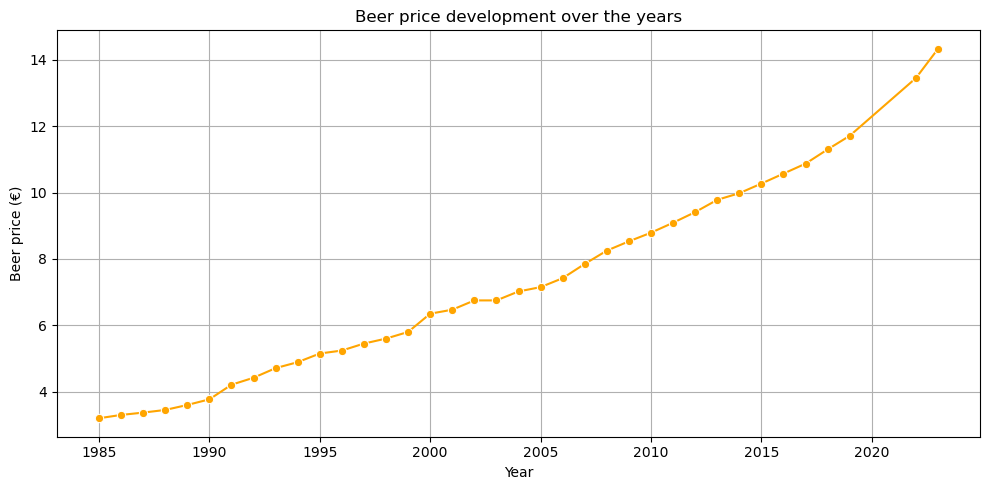

In [2]:
# Beer price development
# Create line plot for beer price over years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="jahr", y="bier_preis", marker="o", color="orange")

# Labeling axes and adding a title
plt.title("Beer price development over the years")
plt.xlabel("Year")
plt.ylabel("Beer price (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation:

According to the graph we have, we can see a clear **upward trend** in beer prices over time at Oktoberfest.

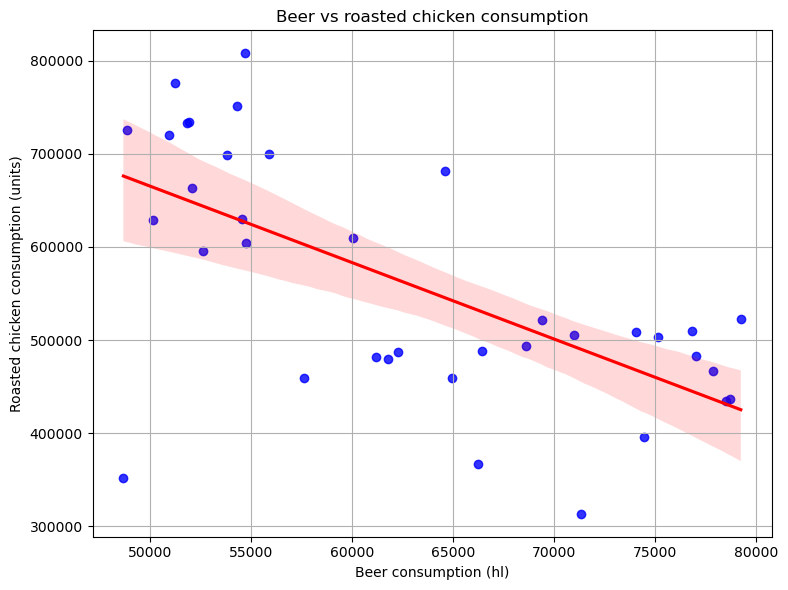

In [3]:
# Relationship between beer and roasted chicken consumption
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="bier_konsum",
    y="hendl_konsum",
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"}
)

# Labeling axes and adding a title
plt.title("Beer vs roasted chicken consumption")
plt.xlabel("Beer consumption (hl)")
plt.ylabel("Roasted chicken consumption (units)")
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation:

The scatter plot with a regression line indicates a **negative** relationship: when beer consumption increases, roasted chicken consumption tends to fall, and vice versa.

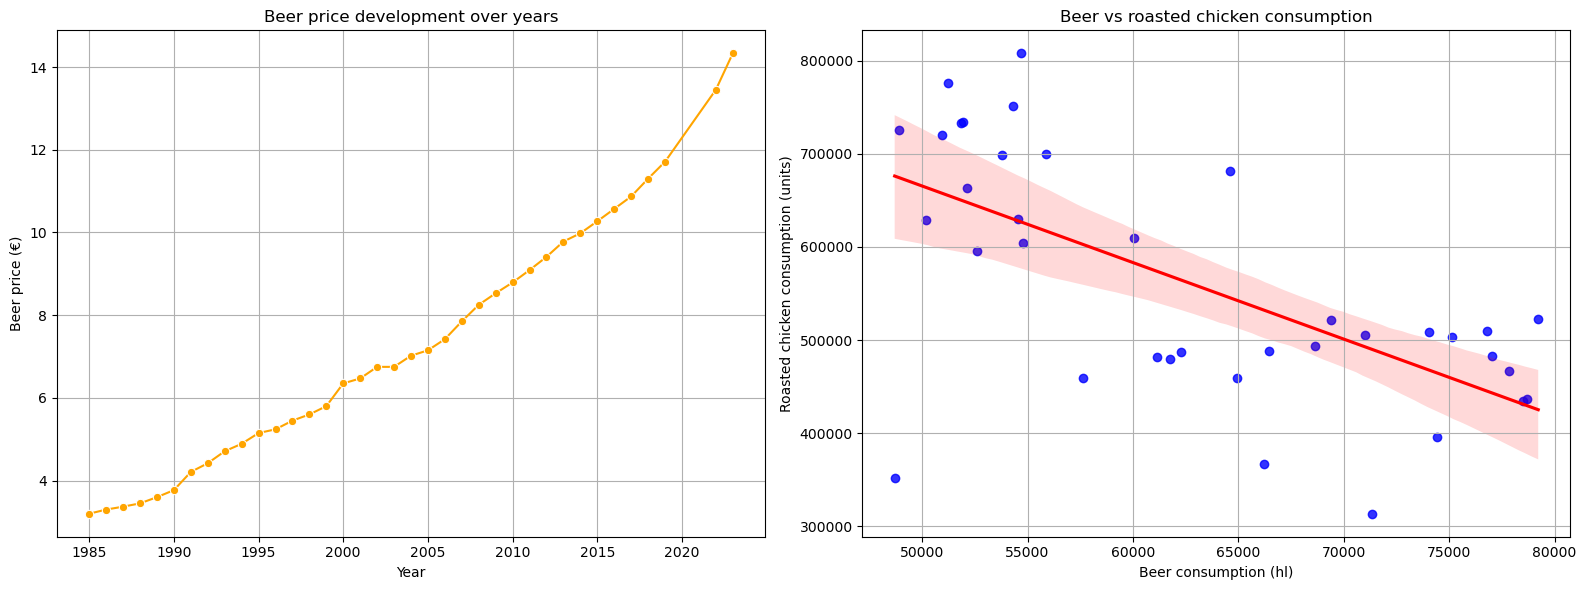

In [4]:
# Subplots
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Beer price development
sns.lineplot(data=df, x="jahr", y="bier_preis", ax=axes[0], marker="o", color="orange")
axes[0].set(title="Beer price development over years", xlabel="Year", ylabel="Beer price (€)")
axes[0].grid(True)

# Plot 2: Beer vs chicken consumption with regression
sns.regplot(data=df, x="bier_konsum", y="hendl_konsum", ax=axes[1],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
axes[1].set(title="Beer vs roasted chicken consumption",
            xlabel="Beer consumption (hl)", ylabel="Roasted chicken consumption (units)")
axes[1].grid(True)

# Final layout adjustment
plt.tight_layout()
plt.show()

### Task 2: Analyzing Beer and Roasted Chicken Prices vs. Consumption
Analyze how **beer and roasted chicken prices** have evolved over time and how this relates to **beer consumption** at the Oktoberfest.

**Plot Beer and Roasted Chicken Prices Over Time**  
- Create a **line plot** showing the **beer and roasted chicken prices** over the years.  
- Use **distinct colors and markers** to differentiate both price trends.  
- Label the axes properly and add a **legend** to indicate which line corresponds to which price.

**Overlay Beer Consumption on a Secondary Y-Axis**  
- Use a **secondary Y-axis** (`twinx()`) to plot the **beer consumption** over time.  
- Ensure that the **scales on both axes are appropriate** and clearly distinguishable.
- Add a **legend** to show the corresponding label.

**Final Touches**  
- Give the visualization a **clear title** and adjust gridlines to enhance readability.  
- Make sure that **both Y-axes are correctly labeled**, indicating units (€/hl).  


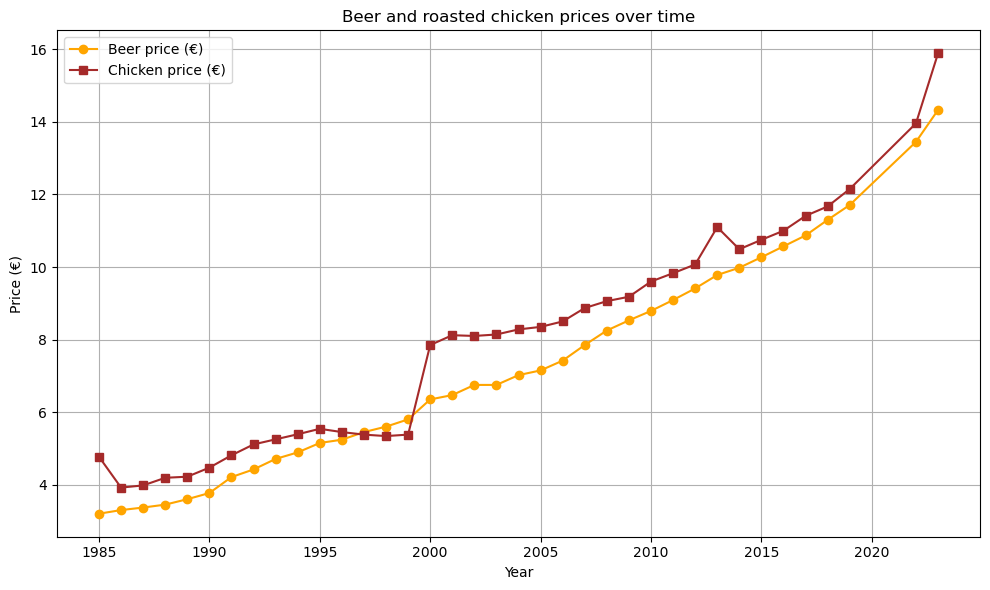

In [5]:
# Plot beer and roasted chicken prices over time
# Create the line plot
plt.figure(figsize=(10, 6))

# Beer price
plt.plot(df["jahr"], df["bier_preis"], marker="o", color="orange", label="Beer price (€)")

# Chicken price
plt.plot(df["jahr"], df["hendl_preis"], marker="s", color="brown", label="Chicken price (€)")

# Labels and legend
plt.title("Beer and roasted chicken prices over time")
plt.xlabel("Year")
plt.ylabel("Price (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation:

According to the graph we have, we can see a clear **upward trend** in beer prices and chicken prices over time at Oktoberfest.

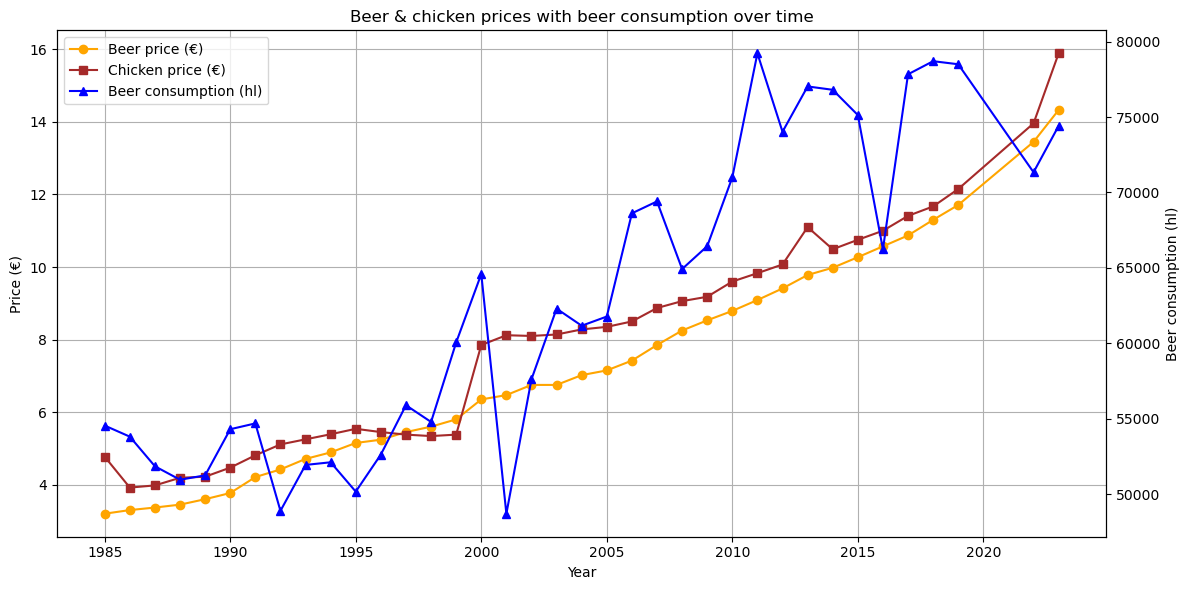

In [6]:
# Overlay beer consumption on a secondary Y-axis
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary Y-axis: Beer & chicken prices
ax1.plot(df["jahr"], df["bier_preis"], marker="o", color="orange", label="Beer price (€)")
ax1.plot(df["jahr"], df["hendl_preis"], marker="s", color="brown", label="Chicken price (€)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Price (€)")
ax1.grid(True)

# Secondary Y-axis: Beer consumption
ax2 = ax1.twinx()
ax2.plot(df["jahr"], df["bier_konsum"], marker="^", color="blue", label="Beer consumption (hl)")
ax2.set_ylabel("Beer consumption (hl)")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Title and layout
plt.title("Beer & chicken prices with beer consumption over time")
plt.tight_layout()
plt.show()

Interpretation:

This graph indicates a **positive** relationship: **higher prices** (both beer price and chicken price) are related with **higher beer consumption** over years (although this growing trend is **very flucturating**). This phenomenon doesn't follow the basic **supply and demand law** in economics, which is a little bit weird. However, it also indicates that there are some other **latent factors**, which are **stronger than price**, influencing the consumption of beer.

In [7]:
# Final touches
# As visulization has already been finished and shown above, relevant codes and results are not repeated here.

### Task 3: Visualizing the Relationship Between Beer Price, Visitors, and Beer Consumption
**Create a Bubble Chart**  
- Generate a **scatter plot** with:  
  - **Total visitors (in millions) on the X-axis**  
  - **Beer price (in €) on the Y-axis**  
- Each point should **represent a year**, so color-code the points by year (`hue` parameter).

**Represent Beer Consumption with Bubble Size**  
- The **bubble size should reflect beer consumption** (larger bubbles for higher beer consumption).  
- Adjust the scaling so that differences in consumption are clearly visible but not overwhelming.

**Final Touches**  
- Use **circular markers (`marker="o"`)** to ensure a clean and readable plot.  
- Label both axes properly and add a **title**.  
- Include a **legend** that differentiates the years.
- Apply **aesthetic improvements**, such as adjusting transparency (`alpha`) and adding gridlines for readability.


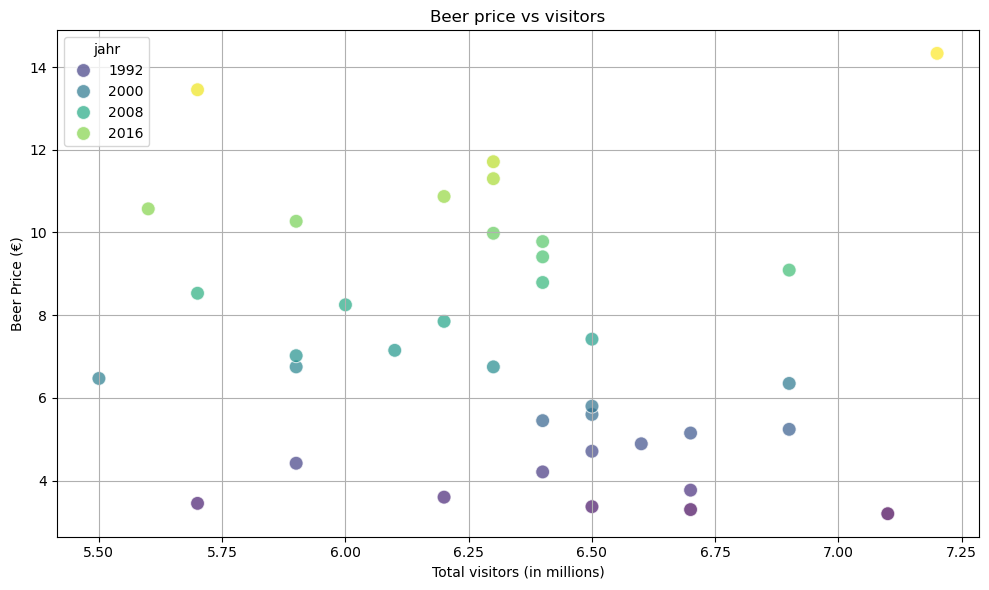

In [16]:
# Create a bubble chart
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="besucher_gesamt",
    y="bier_preis",
    hue="jahr",                
    palette="viridis",
    alpha=0.7,                 
    marker="o",                
    s=100                      
)

# Labels and title
plt.title("Beer price vs visitors")
plt.xlabel("Total visitors (in millions)")
plt.ylabel("Beer Price (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

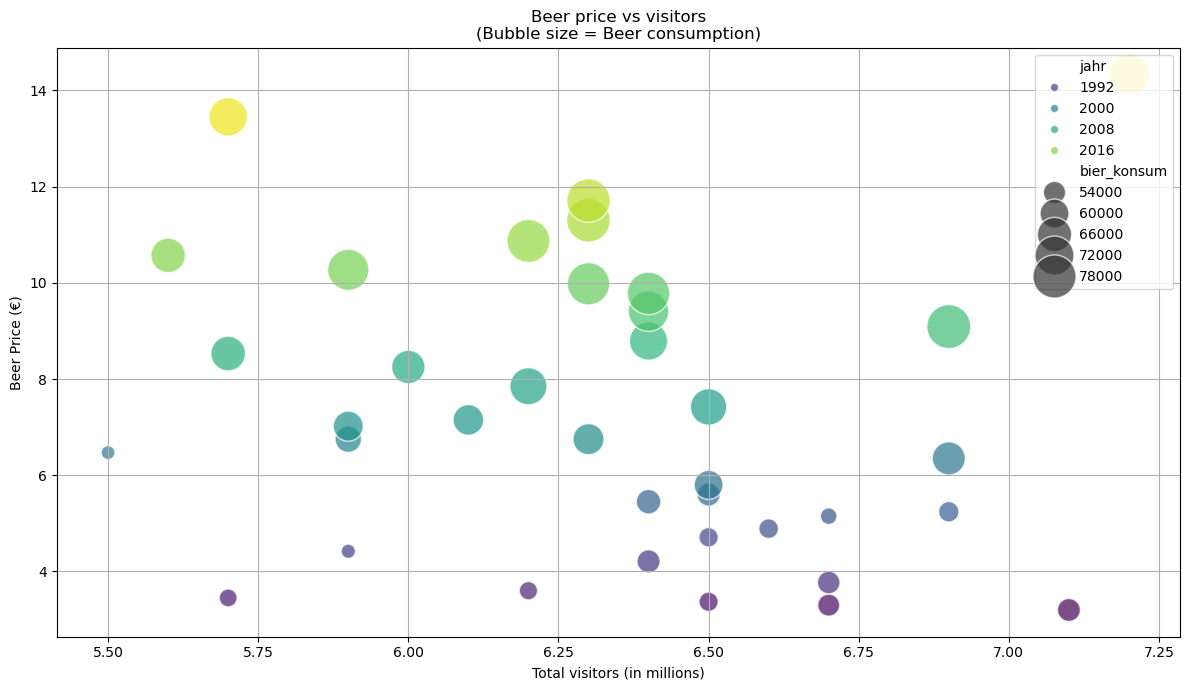

In [17]:
# Represent beer consumption with bubble size
# Bubble plot with beer consumption as size
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x="besucher_gesamt",
    y="bier_preis",
    size="bier_konsum",            
    hue="jahr",                    
    sizes=(100, 1000),             
    alpha=0.7,                     
    marker="o",                    
    palette="viridis",
)

# Labels and title
plt.title("Beer price vs visitors\n(Bubble size = Beer consumption)")
plt.xlabel("Total visitors (in millions)")
plt.ylabel("Beer Price (€)")
plt.legend(fontsize=10, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Final touches
# As visulization has already been finished and shown above, relevant codes and results are not repeated here.